In [1]:
import numpy as np
import scipy.signal as ssgn
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

import graphics_utility as gru

from pathlib import Path
import os

# собственные утилиты для вычисления метрик близости матриц параметров
import dtw_metrics_tslearn as dtm

In [2]:
import importlib
importlib.reload(dtm)

<module 'dtw_metrics_tslearn' from '/media/user/DATA/Python_Projects/rb_tech/Python/dtw_metrics_tslearn.py'>

In [3]:
feature16_path = Path('../data/features_16')
feature32_path = Path('../data/features_32')

In [4]:
f16_path_dictionary = {}

for sub_path in feature16_path.iterdir():
    if False==sub_path.is_dir():
        continue
    f16_path_dictionary[sub_path.name] = {'mfcc': [], 'cq': [], 'wp': []}
    for item in sub_path.iterdir():
        if False== item.is_file() or item.suffix!='.npy':
            continue
        if '_mfcc' in item.stem:
            f16_path_dictionary[sub_path.name]['mfcc'].append(item.absolute())
        elif '_cq' in item.stem:
            f16_path_dictionary[sub_path.name]['cq'].append(item.absolute())
        elif '_wp' in item.stem:
            f16_path_dictionary[sub_path.name]['wp'].append(item.absolute())
        else:
            continue
    f16_path_dictionary[sub_path.name]['mfcc'].sort()
    f16_path_dictionary[sub_path.name]['cq'].sort()
    f16_path_dictionary[sub_path.name]['wp'].sort()

In [5]:
f32_path_dictionary = {}

for sub_path in feature32_path.iterdir():
    if False==sub_path.is_dir():
        continue
    f32_path_dictionary[sub_path.name] = {'mfcc': [], 'cq': [], 'wp': []}
    for item in sub_path.iterdir():
        if False== item.is_file() or item.suffix!='.npy':
            continue
        if '_mfcc' in item.stem:
            f32_path_dictionary[sub_path.name]['mfcc'].append(item.absolute())
        elif '_cq' in item.stem:
            f32_path_dictionary[sub_path.name]['cq'].append(item.absolute())
        elif '_wp' in item.stem:
            f32_path_dictionary[sub_path.name]['wp'].append(item.absolute())
        else:
            continue
    f32_path_dictionary[sub_path.name]['mfcc'].sort()
    f32_path_dictionary[sub_path.name]['cq'].sort()
    f32_path_dictionary[sub_path.name]['wp'].sort()    

#### **Эксперимент 1:**
#### **вычисление дистанций между произнесениями ДВУХ слов**
#### **с использованием различных параметров (MFCC, Constant-Q и Wavelet огибающие),**
#### **мер близости (MSE или DTW distance) и**
#### **способов сравнения матриц (построчно или как рядов колонок)**

In [6]:
def get_interword_distances(word1, word2, path_dictionary, feature, direction):
    '''
    Parameters:
    word1 (str)     : folder name for the first set of commands
    word2 (str)     : folder name for the second set of commands
    path_dictionary : dict of paths to feature folders
    feature (str)   : 'wp' - wavelet packets envelopes, 'mfcc', 'cq' - constant Q spectrum
    direction (str) : 'row' or 'column' - row-wise or column-wise distances
    metrics (str)   : 'distance' or 'mse' - similarity measure of two series: dtw distance or mse between dtw aligned series
    '''
    if feature not in ['wp', 'mfcc', 'cq']:
        print("feature name can be either 'wp' or 'mfcc' or 'cq'")
        return None
    if direction not in ['row', 'column']:
        print("direction can be either 'row' or 'column'")
        return None
    
    dist_matrix = []
    mse_matrix = []
    for path1 in path_dictionary[word1][feature]:
        dist_row = []
        mse_row = []
        features1 = np.load(path1)            
        for path2 in path_dictionary[word2][feature]:
            features2 = np.load(path2)
            if 'row'==direction:
                # calculate similarity metrics                
                distance, mse = dtm.get_row_wise_dtw_metrics(features1, features2)                
            else:
                distance, mse = dtm.get_column_wise_dtw_metrics(features1, features2)                
            dist_row.append(distance)
            mse_row.append(mse)
        dist_matrix.append(dist_row)
        mse_matrix.append(mse_row)
    
    return np.array(dist_matrix), np.array(mse_matrix)

In [7]:
dist1, mse1 = get_interword_distances('bed', 'bed', f16_path_dictionary, 'wp', 'row')

#### Визуализация дистанций между различными произнесениями слова "bed".
#### Параметр - вэйвлет-огибающие.
#### Левая картинка - дистанции DTW, правая - MSE.

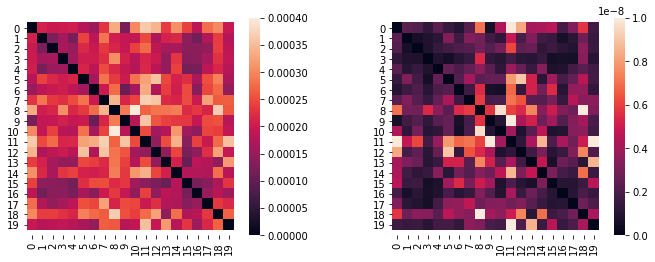

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.heatmap(dist1, square=True, vmin=0.0, vmax=0.0004, ax=ax[0]);
sns.heatmap(mse1, square=True, vmin=0, vmax=1e-8, ax= ax[1]);
bottom, top = ax[0].get_ylim();
ax[0].set_ylim(bottom + 0.5, top - 0.5);
bottom, top = ax[1].get_ylim();
ax[1].set_ylim(bottom + 0.5, top - 0.5);

In [10]:
stats.describe(np.mean(mse1, axis=0))

DescribeResult(nobs=20, minmax=(1.3277046570917417e-09, 5.347484529116743e-09), mean=2.868497363855281e-09, variance=1.0346473428023791e-18, skewness=0.8401301558987718, kurtosis=0.4466089557546695)

In [11]:
stats.describe(np.mean(dist1, axis=0))

DescribeResult(nobs=20, minmax=(0.00015654445268858152, 0.00026272123928429257), mean=0.00020685730948513887, variance=9.108634666558011e-10, skewness=0.28755827688355906, kurtosis=-0.7949087386669538)

In [12]:
dist2, mse2 = get_interword_distances('bed', 'bird', f16_path_dictionary, 'wp', 'row')

#### Визуализация дистанций между произнесениями слов "bed" и "bird".
#### Параметр - вэйвлет-огибающие.
#### Левая картинка - дистанции DTW, правая - MSE.

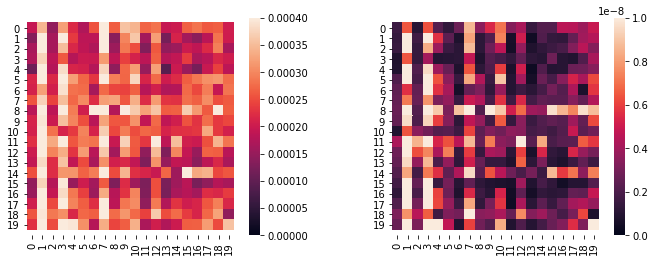

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.heatmap(dist2, square=True, vmin=0.0, vmax=0.0004, ax=ax[0]);
sns.heatmap(mse2, square=True, vmin=0, vmax=1e-8, ax= ax[1]);
bottom, top = ax[0].get_ylim();
ax[0].set_ylim(bottom + 0.5, top - 0.5);
bottom, top = ax[1].get_ylim();
ax[1].set_ylim(bottom + 0.5, top - 0.5);

In [14]:
stats.describe(np.mean(mse2, axis=0))

DescribeResult(nobs=20, minmax=(1.4613026940653155e-09, 1.1169330640702818e-08), mean=4.076877872674424e-09, variance=6.633387108146317e-18, skewness=1.586250306642304, kurtosis=1.7488368725539019)

In [15]:
stats.describe(np.mean(dist2, axis=0))

DescribeResult(nobs=20, minmax=(0.00017932528507332235, 0.0004364094367902469), mean=0.000258909381802921, variance=4.510415441943827e-09, skewness=1.2615001680683036, kurtosis=0.8708420680231521)

In [16]:
dist3, mse3 = get_interword_distances('bed', 'four', f16_path_dictionary, 'wp', 'row')

#### Визуализация дистанций между произнесениями слов "bed" и "four".
#### Параметр - вэйвлет-огибающие.
#### Левая картинка - дистанции DTW, правая - MSE.

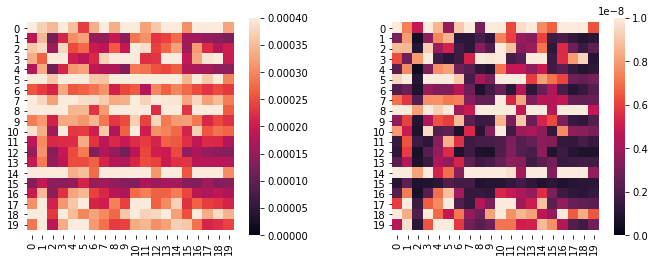

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.heatmap(dist3, square=True, vmin=0.0, vmax=0.0004, ax=ax[0]);
sns.heatmap(mse3, square=True, vmin=0, vmax=1e-8, ax= ax[1]);
bottom, top = ax[0].get_ylim();
ax[0].set_ylim(bottom + 0.5, top - 0.5);
bottom, top = ax[1].get_ylim();
ax[1].set_ylim(bottom + 0.5, top - 0.5);

In [18]:
stats.describe(np.mean(mse3, axis=0))

DescribeResult(nobs=20, minmax=(2.308826506453477e-09, 9.872823064484787e-09), mean=5.351855094393496e-09, variance=3.803418694121369e-18, skewness=0.47701876750017674, kurtosis=-0.2679496782996438)

In [19]:
stats.describe(np.mean(dist3, axis=0))

DescribeResult(nobs=20, minmax=(0.00022439650228605235, 0.000373718130403548), mean=0.0002980035167856014, variance=1.9106578592862148e-09, skewness=0.12879626909379696, kurtosis=-0.8714480550770074)

#### **Эксперимент 2:**
#### **вычисление дистанций между всеми произнесениями ВСЕХ слов**
#### **с использованием различных параметров (MFCC, Constant-Q и Wavelet огибающие),**
#### **мер близости (MSE или DTW distance) и**
#### **способов сравнения матриц (построчно или как рядов колонок)**

In [20]:
def get_global_distances(path_dictionary, feature, direction):
    '''
    Calculates distance metrics for the whole path dictionary
    '''
    if feature not in ['wp', 'mfcc', 'cq']:
        print("feature name can be either 'wp' or 'mfcc' or 'cq'")
        return None
    if direction not in ['row', 'column']:
        print("direction can be either 'row' or 'column'")
        return None
        
    file_aliases = {}
    dist_distances = {}
    mse_distances = {}
    for word1 in path_dictionary:
        word1_count=0
        for path1 in path_dictionary[word1][feature]:
            file1_alias = f'{word1}_{word1_count}'
            if file1_alias not in file_aliases:
                file_aliases[file1_alias] = path1.name
            dist_distances[file1_alias] = {}
            mse_distances[file1_alias] = {}
            features1 = np.load(path1)            
            for word2 in path_dictionary:
                word2_count = 0
                for path2 in path_dictionary[word2][feature]:
                    file2_alias = f'{word2}_{word2_count}'
                    if file2_alias not in file_aliases:
                        file_aliases[file2_alias] = path2.name
                    features2 = np.load(path2)
                    if 'row'==direction:
                        # calculate similarity metrics                
                        distance, mse = dtm.get_row_wise_dtw_metrics(features1, features2)                        
                    else:
                        distance, mse = dtm.get_column_wise_dtw_metrics(features1, features2)
                    dist_distances[file1_alias][file2_alias] = distance
                    mse_distances[file1_alias][file2_alias] = mse
                    word2_count += 1
            word1_count += 1       
    return file_aliases, dist_distances, mse_distances

#### **Идеальная матрица расстояний между словами должна выглядеть так:**
![dtw ideal distances](DTW_Ideal_distances.jpg)
#### **Т.е. расстояния между произнесениями одного и того же слова должны быть минимальными,**
#### **а расстояния до произнесений других слов должны быть максимальными.**

In [22]:
file_aliases, mfcc16_row_dist_distances_dict, mfcc16_row_mse_distances_dict = get_global_distances(
    f16_path_dictionary,
    'mfcc',
    'row'
)

In [23]:
mfcc16_row_dist_distances = pd.DataFrame.from_dict(mfcc16_row_dist_distances_dict)

In [24]:
mfcc16_row_mse_distances = pd.DataFrame.from_dict(mfcc16_row_mse_distances_dict)

#### Визуализация дистанций между словами.
#### Параметр - MFCC.
#### Способ сравнения - построчно.
#### Левая картинка - дистанции DTW, правая - MSE.

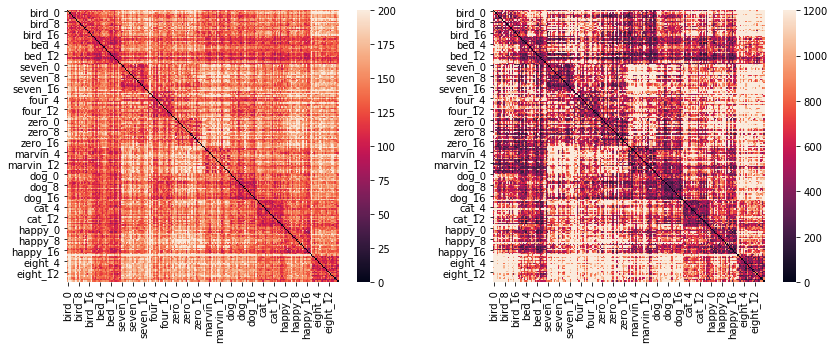

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(mfcc16_row_dist_distances, vmin=0.0, vmax=200, square=True, ax= ax[0]);
sns.heatmap(mfcc16_row_mse_distances, vmin=0.0, vmax=1200, square=True, ax=ax[1]);

In [26]:
mfcc16_mean_row_dist_distances = mfcc16_row_dist_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [27]:
mfcc16_mean_row_dist_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,101.841298,132.885497,121.902050,124.582427,134.410189,141.629402,124.466123,129.775254,144.179828,144.725930
bird,132.885497,112.788071,148.250203,137.844161,174.869960,152.397636,145.826454,131.653173,160.663951,154.617653
cat,121.902050,148.250203,103.136594,134.068959,138.339931,147.042585,135.375852,153.986678,151.081515,155.744294
dog,124.582427,137.844161,134.068959,104.258939,161.182754,131.914218,143.003612,138.748987,154.745051,151.206723
eight,134.410189,174.869960,138.339931,161.182754,110.102975,164.097342,153.596946,171.516293,173.714237,170.202906
four,141.629402,152.397636,147.042585,131.914218,164.097342,114.668366,163.173113,159.216386,147.428416,146.472009
happy,124.466123,145.826454,135.375852,143.003612,153.596946,163.173113,114.186708,149.493719,157.466429,174.897208
marvin,129.775254,131.653173,153.986678,138.748987,171.516293,159.216386,149.493719,127.743593,170.916353,177.296027
seven,144.179828,160.663951,151.081515,154.745051,173.714237,147.428416,157.466429,170.916353,111.538044,147.126232
zero,144.725930,154.617653,155.744294,151.206723,170.202906,146.472009,174.897208,177.296027,147.126232,125.679811


In [28]:
mfcc16_mean_row_mse_distances = mfcc16_row_mse_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [29]:
mfcc16_mean_row_mse_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,465.181093,876.968268,620.950746,631.779283,841.656632,901.146919,565.606842,507.009837,856.734788,661.960942
bird,876.211077,606.741923,1061.237740,775.705032,1741.525458,1017.757238,922.036079,554.443993,1114.155050,753.269105
cat,619.194287,1060.084308,415.774770,786.907690,857.600559,1061.757630,725.220265,1039.891169,1049.684754,1034.907822
dog,631.431816,775.681628,788.328962,394.290998,1344.738212,689.931540,792.969293,605.646521,988.694185,716.963708
eight,840.646698,1741.829020,857.821780,1344.711183,473.093967,1511.151927,1002.858010,1287.865824,1524.419632,1457.237448
four,898.139585,1014.391879,1060.897479,689.203944,1509.848660,522.639946,1192.066756,1023.318715,873.583736,718.600625
happy,564.797812,922.266011,725.601577,792.482903,1002.761721,1193.079143,473.787714,801.307827,1040.904641,1201.189959
marvin,506.556879,554.047117,1039.824264,605.512292,1287.269534,1023.214291,800.595331,508.749011,1540.681297,1156.188712
seven,855.078805,1112.329257,1049.456759,987.994659,1522.804732,873.649325,1038.740433,1539.734127,425.036992,754.768275
zero,660.758313,752.483032,1033.636791,716.365917,1456.097467,718.248478,1199.367881,1154.853722,754.323928,488.174964


In [30]:
_, wp16_row_dist_distances_dict, wp16_row_mse_distances_dict = get_global_distances(
    f16_path_dictionary,
    'wp',
    'row'
)

In [31]:
wp16_row_dist_distances = pd.DataFrame.from_dict(wp16_row_dist_distances_dict)

In [32]:
wp16_row_mse_distances = pd.DataFrame.from_dict(wp16_row_mse_distances_dict)

#### Визуализация дистанций между словами.
#### Параметр - вэйвлет-огибающие.
#### Способ сравнения - построчно.
#### Левая картинка - дистанции DTW, правая - MSE.

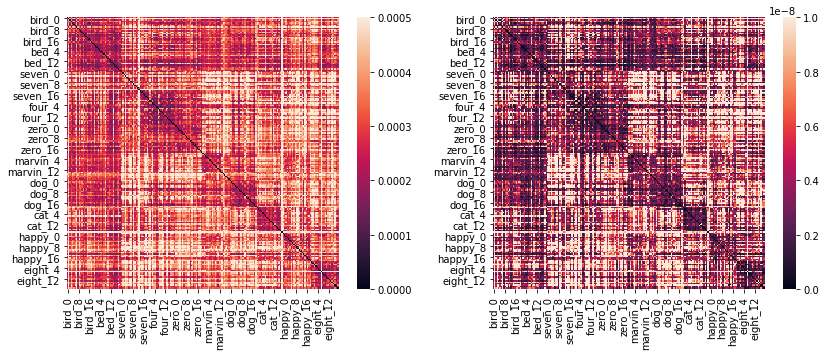

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(wp16_row_dist_distances, vmin=0.0, vmax=0.0005, square=True, ax= ax[0]);
sns.heatmap(wp16_row_mse_distances, vmin=0.0, vmax=1e-8, square=True, ax=ax[1]);

In [34]:
wp16_mean_row_dist_distances = wp16_row_dist_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [35]:
wp16_mean_row_dist_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,0.000207,0.000259,0.000310,0.000265,0.000318,0.000298,0.000325,0.000292,0.000330,0.000292
bird,0.000259,0.000252,0.000358,0.000298,0.000389,0.000319,0.000369,0.000307,0.000366,0.000305
cat,0.000310,0.000358,0.000274,0.000383,0.000402,0.000381,0.000370,0.000399,0.000364,0.000390
dog,0.000265,0.000298,0.000383,0.000225,0.000439,0.000331,0.000404,0.000322,0.000408,0.000357
eight,0.000318,0.000389,0.000402,0.000439,0.000272,0.000434,0.000382,0.000402,0.000438,0.000403
four,0.000298,0.000319,0.000381,0.000331,0.000434,0.000197,0.000438,0.000399,0.000321,0.000270
happy,0.000325,0.000369,0.000370,0.000404,0.000382,0.000438,0.000285,0.000354,0.000411,0.000430
marvin,0.000292,0.000307,0.000399,0.000322,0.000402,0.000399,0.000354,0.000294,0.000448,0.000415
seven,0.000330,0.000366,0.000364,0.000408,0.000438,0.000321,0.000411,0.000448,0.000300,0.000338
zero,0.000292,0.000305,0.000390,0.000357,0.000403,0.000270,0.000430,0.000415,0.000338,0.000246


In [36]:
wp16_mean_row_mse_distances = wp16_row_mse_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [37]:
wp16_mean_row_mse_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,2.868497e-09,4.093155e-09,5.217717e-09,3.626796e-09,5.418193e-09,5.352524e-09,5.014669e-09,3.240111e-09,5.812605e-09,4.407963e-09
bird,4.076878e-09,4.040759e-09,6.977731e-09,4.710074e-09,8.481368e-09,6.365291e-09,6.833747e-09,3.815096e-09,7.039717e-09,4.568403e-09
cat,5.211500e-09,6.958226e-09,3.752033e-09,7.816822e-09,7.440767e-09,7.565353e-09,6.666430e-09,8.455407e-09,6.582901e-09,7.514118e-09
dog,3.619384e-09,4.717703e-09,7.817212e-09,2.660393e-09,1.060899e-08,6.530032e-09,8.024882e-09,4.542953e-09,9.113732e-09,6.683679e-09
eight,5.406373e-09,8.486849e-09,7.438739e-09,1.062490e-08,3.524656e-09,1.101398e-08,6.718682e-09,7.222810e-09,9.810495e-09,8.908161e-09
four,5.351855e-09,6.388248e-09,7.587098e-09,6.543780e-09,1.102000e-08,2.934936e-09,9.362503e-09,8.369930e-09,4.757912e-09,3.411481e-09
happy,4.996780e-09,6.819042e-09,6.640219e-09,8.009088e-09,6.746494e-09,9.344980e-09,3.720872e-09,5.701190e-09,8.236710e-09,8.823723e-09
marvin,3.234444e-09,3.814072e-09,8.443733e-09,4.526929e-09,7.217498e-09,8.349818e-09,5.687319e-09,3.866987e-09,1.107196e-08,8.064180e-09
seven,5.798262e-09,7.026493e-09,6.572659e-09,9.097742e-09,9.816090e-09,4.754976e-09,8.267858e-09,1.107252e-08,3.989547e-09,5.126302e-09
zero,4.401604e-09,4.566363e-09,7.520004e-09,6.679087e-09,8.914954e-09,3.407733e-09,8.824404e-09,8.074077e-09,5.137384e-09,2.634000e-09


In [38]:
_, cq16_row_dist_distances_dict, cq16_row_mse_distances_dict = get_global_distances(
    f16_path_dictionary,
    'cq',
    'row'
)

In [39]:
cq16_row_dist_distances = pd.DataFrame.from_dict(cq16_row_dist_distances_dict)

In [40]:
cq16_row_mse_distances = pd.DataFrame.from_dict(cq16_row_mse_distances_dict)

#### Визуализация дистанций между словами.
#### Параметр - Constant Q.
#### Способ сравнения - построчно.
#### Левая картинка - дистанции DTW, правая - MSE.

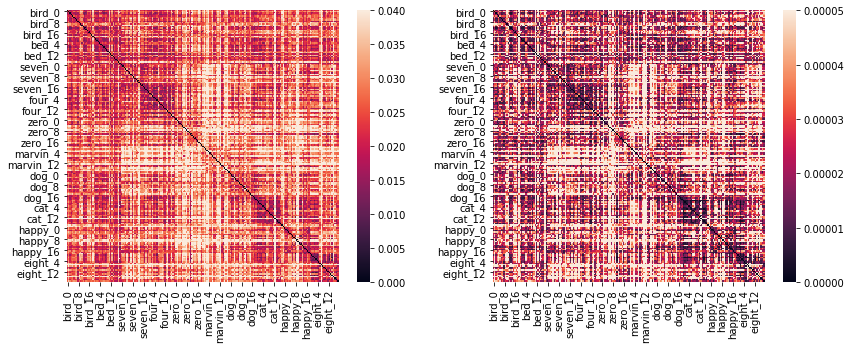

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(cq16_row_dist_distances, vmax=0.04, square=True, ax= ax[0]);
sns.heatmap(cq16_row_mse_distances, vmax=0.00005, square=True, ax=ax[1]);

In [47]:
cq16_mean_row_dist_distances = cq16_row_dist_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [48]:
cq16_mean_row_dist_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,0.020956,0.023488,0.025399,0.024225,0.025860,0.023786,0.026440,0.030155,0.025664,0.029290
bird,0.023488,0.022343,0.028731,0.025965,0.029247,0.024933,0.028703,0.030009,0.027339,0.028904
cat,0.025399,0.028731,0.021942,0.029092,0.028416,0.028194,0.028030,0.036794,0.028649,0.034461
dog,0.024225,0.025965,0.029092,0.023223,0.032433,0.027545,0.029094,0.031664,0.030593,0.033828
eight,0.025860,0.029247,0.028416,0.032433,0.022568,0.030666,0.030864,0.037752,0.032493,0.033678
four,0.023786,0.024933,0.028194,0.027545,0.030666,0.019592,0.029800,0.036129,0.024012,0.029496
happy,0.026440,0.028703,0.028030,0.029094,0.030864,0.029800,0.023765,0.033893,0.029173,0.036442
marvin,0.030155,0.030009,0.036794,0.031664,0.037752,0.036129,0.033893,0.031011,0.037619,0.038417
seven,0.025664,0.027339,0.028649,0.030593,0.032493,0.024012,0.029173,0.037619,0.021717,0.030494
zero,0.029290,0.028904,0.034461,0.033828,0.033678,0.029496,0.036442,0.038417,0.030494,0.028077


In [49]:
cq16_mean_row_mse_distances = cq16_row_mse_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [50]:
cq16_mean_row_mse_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,0.000032,0.000035,0.000035,0.000031,0.000043,0.000033,0.000034,0.000041,0.000037,0.000037
bird,0.000035,0.000032,0.000043,0.000034,0.000051,0.000033,0.000038,0.000040,0.000037,0.000034
cat,0.000035,0.000043,0.000032,0.000042,0.000043,0.000041,0.000040,0.000074,0.000045,0.000050
dog,0.000031,0.000034,0.000042,0.000028,0.000055,0.000035,0.000034,0.000044,0.000042,0.000045
eight,0.000043,0.000051,0.000043,0.000054,0.000040,0.000056,0.000048,0.000075,0.000060,0.000057
four,0.000033,0.000033,0.000041,0.000035,0.000056,0.000021,0.000037,0.000064,0.000027,0.000038
happy,0.000034,0.000038,0.000040,0.000034,0.000048,0.000037,0.000024,0.000052,0.000037,0.000050
marvin,0.000041,0.000040,0.000074,0.000044,0.000075,0.000064,0.000052,0.000047,0.000071,0.000063
seven,0.000037,0.000037,0.000045,0.000042,0.000060,0.000027,0.000037,0.000071,0.000023,0.000041
zero,0.000037,0.000034,0.000050,0.000045,0.000057,0.000038,0.000050,0.000063,0.000041,0.000039


In [51]:
_, mfcc16_col_dist_distances_dict, mfcc16_col_mse_distances_dict = get_global_distances(
    f16_path_dictionary,
    'mfcc',
    'column'
)

In [52]:
mfcc16_col_dist_distances = pd.DataFrame.from_dict(mfcc16_col_dist_distances_dict)

In [53]:
mfcc16_col_mse_distances = pd.DataFrame.from_dict(mfcc16_col_mse_distances_dict)

#### Визуализация дистанций между словами.
#### Параметр - MFCC.
#### Способ сравнения - двумерный ряд колонок.
#### Левая картинка - дистанции DTW, правая - MSE.

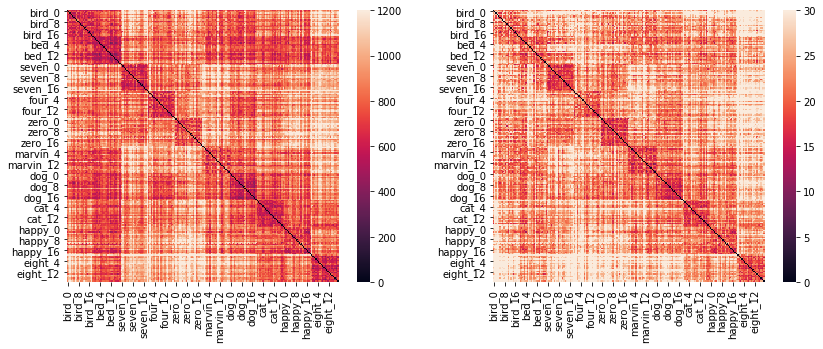

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(mfcc16_col_dist_distances, vmin=0.0, vmax=1200, square=True, ax= ax[0]);
sns.heatmap(mfcc16_col_mse_distances, vmin=0.0, vmax=30, square=True, ax=ax[1]);

In [55]:
mfcc16_mean_col_dist_distances = mfcc16_col_dist_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [56]:
mfcc16_mean_col_dist_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,559.183295,742.754644,728.839136,707.790366,783.970659,836.159014,737.449814,791.124135,914.602778,921.749063
bird,742.754644,626.600893,881.329221,761.160708,1050.042796,872.182073,878.886448,808.908115,1046.663064,966.401701
cat,728.839136,881.329221,601.392890,782.674772,819.868667,886.020990,797.906845,957.106784,912.930787,985.425412
dog,707.790366,761.160708,782.674772,578.088709,969.312019,754.508724,830.719934,811.800213,921.705189,892.123047
eight,783.970659,1050.042796,819.868667,969.312019,625.182490,1037.302077,895.523785,1077.736499,1066.942148,1149.443536
four,836.159014,872.182073,886.020990,754.508724,1037.302077,659.193805,970.482142,974.125663,884.485319,914.044269
happy,737.449814,878.886448,797.906845,830.719934,895.523785,970.482142,675.995344,906.830740,955.351265,1079.910225
marvin,791.124135,808.908115,957.106784,811.800213,1077.736499,974.125663,906.830740,743.105294,1096.935484,1048.937599
seven,914.602778,1046.663064,912.930787,921.705189,1066.942148,884.485319,955.351265,1096.935484,632.341022,875.157950
zero,921.749063,966.401701,985.425412,892.123047,1149.443536,914.044269,1079.910225,1048.937599,875.157950,727.219388


In [57]:
mfcc16_mean_col_mse_distances = mfcc16_col_mse_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [58]:
mfcc16_mean_col_mse_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,19.497802,25.296744,23.146829,22.314418,25.471083,26.637703,22.555441,22.667237,25.491356,25.140756
bird,25.287759,20.966588,27.232485,23.773602,33.426792,26.787144,26.492030,23.136384,27.356394,24.463576
cat,23.138653,27.236722,17.736132,22.671699,24.322058,26.471328,22.466650,26.175242,25.421891,25.977673
dog,22.307922,23.771491,22.667846,16.523688,28.463468,22.202901,23.016524,21.524977,24.279015,22.297091
eight,25.472171,33.442414,24.330891,28.476090,18.250001,31.673423,25.575388,28.381597,29.962694,30.538158
four,26.621086,26.768689,26.450579,22.195955,31.665561,19.455701,27.869393,26.581680,24.468189,24.266867
happy,22.551068,26.502180,22.474242,23.018773,25.571020,27.876844,18.531687,23.336474,25.092404,27.074762
marvin,22.665364,23.136638,26.177082,21.523975,28.373736,26.586220,23.332335,17.587840,28.211958,24.736656
seven,25.485538,27.341479,25.404522,24.268387,29.949863,24.465224,25.070046,28.194488,16.899633,22.068288
zero,25.138048,24.458604,25.969391,22.292123,30.532510,24.265058,27.065468,24.728827,22.069382,17.224010


In [59]:
_, wp16_col_dist_distances_dict, wp16_col_mse_distances_dict = get_global_distances(
    f16_path_dictionary,
    'wp',
    'column'
)

In [60]:
wp16_col_dist_distances = pd.DataFrame.from_dict(wp16_col_dist_distances_dict)

In [61]:
wp16_col_mse_distances = pd.DataFrame.from_dict(wp16_col_mse_distances_dict)

#### Визуализация дистанций между словами.
#### Параметр - вэйвлет-огибающие.
#### Способ сравнения - двумерный ряд колонок.
#### Левая картинка - дистанции DTW, правая - MSE.

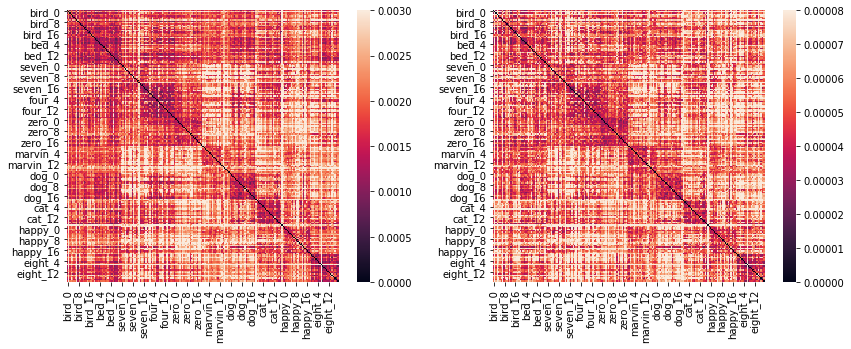

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(wp16_col_dist_distances, vmax=0.003, square=True, ax= ax[0]);
sns.heatmap(wp16_col_mse_distances, vmax=0.00008, square=True, ax=ax[1]);

In [63]:
wp16_mean_col_dist_distances = wp16_col_dist_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [64]:
wp16_mean_col_dist_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,0.001365,0.001640,0.001953,0.001752,0.001910,0.001840,0.002089,0.002029,0.002116,0.002020
bird,0.001640,0.001600,0.002184,0.001943,0.002255,0.001984,0.002300,0.002136,0.002286,0.002064
cat,0.001953,0.002184,0.001667,0.002276,0.002260,0.002193,0.002172,0.002622,0.002182,0.002527
dog,0.001752,0.001943,0.002276,0.001430,0.002668,0.002044,0.002443,0.002179,0.002489,0.002403
eight,0.001910,0.002255,0.002260,0.002668,0.001586,0.002493,0.002312,0.002647,0.002529,0.002499
four,0.001840,0.001984,0.002193,0.002044,0.002493,0.001345,0.002556,0.002574,0.001904,0.001809
happy,0.002089,0.002300,0.002172,0.002443,0.002312,0.002556,0.001758,0.002364,0.002373,0.002751
marvin,0.002029,0.002136,0.002622,0.002179,0.002647,0.002574,0.002364,0.001926,0.002793,0.002668
seven,0.002116,0.002286,0.002182,0.002489,0.002529,0.001904,0.002373,0.002793,0.001727,0.002155
zero,0.002020,0.002064,0.002527,0.002403,0.002499,0.001809,0.002751,0.002668,0.002155,0.001601


In [65]:
wp16_mean_col_mse_distances = wp16_col_mse_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [66]:
wp16_mean_col_mse_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,0.000047,0.000055,0.000063,0.000053,0.000062,0.000058,0.000063,0.000055,0.000060,0.000057
bird,0.000055,0.000053,0.000070,0.000060,0.000072,0.000062,0.000070,0.000058,0.000066,0.000060
cat,0.000063,0.000070,0.000049,0.000067,0.000067,0.000066,0.000061,0.000069,0.000061,0.000067
dog,0.000053,0.000060,0.000067,0.000040,0.000077,0.000059,0.000068,0.000056,0.000069,0.000065
eight,0.000062,0.000072,0.000067,0.000077,0.000045,0.000076,0.000065,0.000066,0.000072,0.000069
four,0.000058,0.000063,0.000065,0.000059,0.000076,0.000040,0.000074,0.000067,0.000052,0.000048
happy,0.000063,0.000070,0.000061,0.000068,0.000065,0.000074,0.000047,0.000058,0.000064,0.000072
marvin,0.000055,0.000058,0.000069,0.000056,0.000066,0.000067,0.000057,0.000045,0.000072,0.000065
seven,0.000060,0.000066,0.000061,0.000069,0.000072,0.000052,0.000064,0.000072,0.000045,0.000054
zero,0.000057,0.000060,0.000067,0.000065,0.000069,0.000048,0.000072,0.000065,0.000054,0.000038


In [67]:
_, cq16_col_dist_distances_dict, cq16_col_mse_distances_dict = get_global_distances(
    f16_path_dictionary,
    'cq',
    'column'
)

In [68]:
cq16_col_dist_distances = pd.DataFrame.from_dict(cq16_col_dist_distances_dict)

In [69]:
cq16_col_mse_distances = pd.DataFrame.from_dict(cq16_col_mse_distances_dict)

#### Визуализация дистанций между словами.
#### Параметр - constant Q.
#### Способ сравнения - двумерный ряд колонок.
#### Левая картинка - дистанции DTW, правая - MSE.

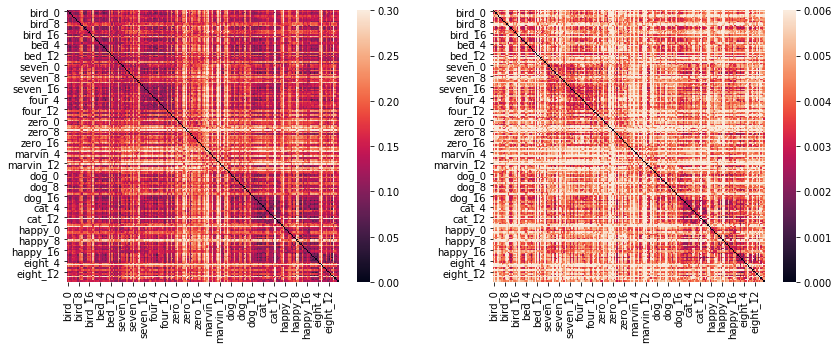

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.heatmap(cq16_col_dist_distances, vmax=0.3, square=True, ax= ax[0]);
sns.heatmap(cq16_col_mse_distances, vmax=0.006, square=True, ax=ax[1]);

In [71]:
cq16_mean_col_dist_distances = cq16_col_dist_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [72]:
cq16_mean_col_dist_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,0.130974,0.145028,0.161406,0.148507,0.166802,0.146701,0.162486,0.202161,0.160118,0.194929
bird,0.145028,0.139713,0.175424,0.157234,0.178593,0.150488,0.173727,0.201453,0.166102,0.191132
cat,0.161406,0.175424,0.146733,0.172306,0.177573,0.169596,0.168147,0.231562,0.172894,0.214921
dog,0.148507,0.157234,0.172306,0.144752,0.188254,0.161255,0.170225,0.208483,0.175039,0.207321
eight,0.166802,0.178593,0.177573,0.188254,0.163630,0.183311,0.185225,0.235168,0.192385,0.215982
four,0.146701,0.150488,0.169596,0.161255,0.183311,0.125436,0.172211,0.224652,0.149067,0.194225
happy,0.162486,0.173727,0.168147,0.170225,0.185225,0.172211,0.143401,0.213342,0.166984,0.218378
marvin,0.202161,0.201453,0.231562,0.208483,0.235168,0.224652,0.213342,0.204349,0.225951,0.235262
seven,0.160118,0.166102,0.172894,0.175039,0.192385,0.149067,0.166984,0.225951,0.137463,0.196874
zero,0.194929,0.191132,0.214921,0.207321,0.215982,0.194225,0.218378,0.235262,0.196874,0.189371


In [73]:
cq16_mean_col_mse_distances = cq16_col_mse_distances.groupby(
    lambda x: x.split('_')[0], axis=0
).mean().groupby(
    lambda x: x.split('_')[0], axis=1
).mean()

In [74]:
cq16_mean_col_mse_distances

,bed,bird,cat,dog,eight,four,happy,marvin,seven,zero
bed,0.004639,0.004969,0.005295,0.004712,0.005476,0.004831,0.005071,0.005681,0.005130,0.005527
bird,0.004962,0.004676,0.005622,0.004909,0.005667,0.004806,0.005322,0.005668,0.005149,0.005477
cat,0.005300,0.005631,0.003892,0.004944,0.004916,0.004988,0.004538,0.006024,0.004751,0.005250
dog,0.004709,0.004911,0.004935,0.004122,0.005325,0.004732,0.004702,0.005364,0.004993,0.005447
eight,0.005483,0.005672,0.004914,0.005329,0.004520,0.005536,0.005046,0.006052,0.005520,0.005585
four,0.004833,0.004810,0.004984,0.004735,0.005534,0.003723,0.004922,0.005926,0.004273,0.005060
happy,0.005072,0.005331,0.004534,0.004707,0.005054,0.004923,0.003688,0.005142,0.004539,0.005387
marvin,0.005678,0.005668,0.006020,0.005359,0.006047,0.005922,0.005132,0.004857,0.005834,0.005654
seven,0.005129,0.005152,0.004752,0.004993,0.005518,0.004274,0.004540,0.005839,0.003636,0.004830
zero,0.005525,0.005477,0.005249,0.005444,0.005593,0.005058,0.005381,0.005655,0.004822,0.004576


#### **Предварительный вывод по визуализациям матриц расстояний между словами:**
#### **наиболее близкую к идеальной картину даёт использование MFCC и сравнение двумерных рядов колонок.**